# Курс орнитологии

1. Реализуйте модель для извлечения признаков из голоса птиц. За основу можно брать:
   - преобразование в аудиофичи (например как mfcc в лекции. Конкретно это преобразование использовать нельзя)
   - обученные поверх аудиофич ML модели
  
1. С помощью модели и одного из предложенных датасетов создайте эмбеддинги пения птиц. Создайте эмбеддинги нескольких записей каждого вида птиц. Визуализируйте эмбеддинги. Для визуализации рекомендуется использовать подмножество видов птиц

1. Аргументируйте почему ваша модель хорошо извлекает признаки из аудио. 
    - Покажите кластеризацию эмбеддингов по видам

1. С помощью эмбеддингов найдите похожие по звучанию виды птиц. Выведите примеры их пения в ноутбуке.



Датасеты:
1. [Датасет](https://www.kaggle.com/vinayshanbhag/bird-song-data-set) американских птиц
1. Почищенный от фонового шума BirdCall [датасет](https://www.kaggle.com/luisblanche/birdcall-singing-3)
1. [Датасет](https://www.kaggle.com/luisblanche/birdcall-singing-0) BirdCall часть 1

In [1]:
#Установка дополнительных библиотек
#пакет для анализа музыки и аудио:
! pip install librosa
#пакет для преобразования аудио:
! pip install soundfile
#пакет ввода-вывода аудио:
! pip3 install torchaudio

^C


You should consider upgrading via the 'D:\Anaconda\python.exe -m pip install --upgrade pip' command.


^C


In [1]:
!pip install scipy==1.6.3 --user

     ---------------------------------------- 32.7/32.7 MB 4.9 MB/s eta 0:00:00


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.2.0 requires scipy==1.4.1; python_version >= "3", but you have scipy 1.6.3 which is incompatible.


In [1]:
#подключаем необходимые библиотеки:
import numpy as np
import pandas as pd
import librosa
import librosa.display as librosa_display
import torchaudio
import torch

In [3]:
#Загрузим датасет с голосами птиц
birds = pd.read_csv('bird_songs_metadata.csv')

In [ ]:
#Просмотрим данные
#birds.head()

In [5]:
#Создадим табл. с определенными столбцами
birds = birds[['id', 'name', 'filename']]

In [6]:
#импортируем библиотеку для построения графиков
import matplotlib.pyplot as plt

(array([ 893.,    0., 1182.,    0.,    0., 1017.,    0., 1256.,    0.,
        1074.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

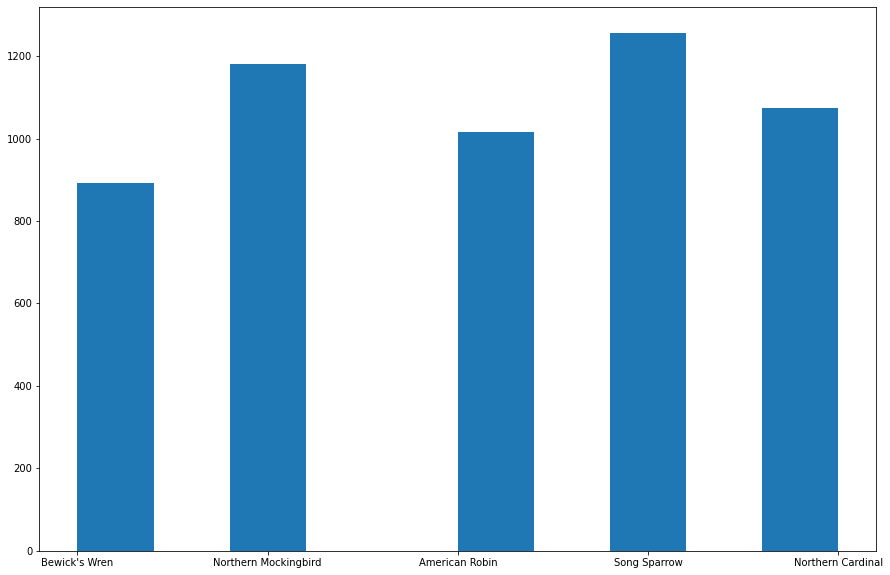

In [7]:
#Построим диаграмму по количеству птиц разных видов
plt.figure(figsize=(15, 10))
plt.hist(birds['name'])

In [8]:
#подключим библиотеку для преобразования объектов в поток байт
import pickle
from pathlib import Path

In [9]:
#используем архив
path = Path('wavfiles')

In [12]:
import os
from tqdm import tqdm
#Используем librosa для анализа аудио
# загрузим датасет

speechs = []
for file_name in tqdm(birds['filename']):
    path_ = path / file_name
    
    #Загрузим аудио
    wave, sample_rate = librosa.load(path_)
    #Обрежем начало и конец аудиофайла
    wave, _ = librosa.effects.trim(wave)
    #Вычисляем вариант цветности «Нормализованная энергия цветности» (CENS)
    feature = librosa.feature.chroma_cens(y=wave, sr=sample_rate)
    speechs.append(feature)
#Запишем побайтно
with open("speechs.txt", "wb") as fp:  
    pickle.dump(speechs, fp)

 12%|█▏        | 628/5422 [01:36<11:41,  6.84it/s]D:\Anaconda\lib\site-packages\librosa\core\pitch.py:153: UserWarning: Trying to estimate tuning from empty frequency set.
  warnings.warn("Trying to estimate tuning from empty frequency set.")
 19%|█▉        | 1042/5422 [02:36<10:53,  6.71it/s]D:\Anaconda\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=1010
  warnings.warn(
 42%|████▏     | 2261/5422 [05:35<08:31,  6.18it/s]D:\Anaconda\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=938
  warnings.warn(
 53%|█████▎    | 2874/5422 [07:05<05:50,  7.28it/s]D:\Anaconda\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=960
  warnings.warn(
 58%|█████▊    | 3133/5422 [07:42<05:22,  7.10it/s]D:\Anaconda\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of 

Характеристики цветности - это представление музыкального звука, в котором используется 12-элементное представление спектра, который называется вектором цветности. В нем каждый из 12 интервалов представляет 12 классов высоты звука с одинаковым темпом для музыки. Его вычисляют из логарифмического кратковременного преобразования Фурье входного звукового сигнала.

Другой особенностью, основанной на цветности, является нормализованная статистика распределения энергии цветности (CENS), которая обычно используется для выявления сходства между различными интерпретациями данной музыки. Основная идея CENS заключается в том, что сбор статистики по большим окнам аудиофайла сглаживает локальные отклонения в темпе, артикуляции и музыкальном оформлении. CENS обычно реализуются для задач сопоставления звука и подобия.

In [13]:
#Считаем побайтно с файла
with open("speechs.txt", "rb") as fp:   # Unpickling
    b = pickle.load(fp)

In [14]:
len(b[0][0])

130

In [15]:
speechs = b

In [16]:
#Используем метод ближайших соседей
from sklearn.neighbors import KNeighborsClassifier

In [17]:
knn_clf = KNeighborsClassifier()

In [18]:
names = list(set(birds['name']))

In [19]:
names

['American Robin',
 'Song Sparrow',
 'Northern Cardinal',
 'Northern Mockingbird',
 "Bewick's Wren"]

In [20]:
#Добавим id согласно виду птицы
birds['name_id'] = birds['name'].apply(lambda x: names.index(x))

In [21]:
#Запишем спичи в отдельный столбец
birds['speechs'] = speechs

In [22]:
birds['speechs'] = birds['speechs'].apply(lambda x: x.reshape(np.product(x.shape)))

In [23]:
birds['len'] = birds['speechs'].apply(lambda x: len(x))

In [24]:
birds = birds[birds['len'] == 1560]

In [25]:
from sklearn.utils import shuffle
birds = shuffle(birds)

In [26]:
type(birds['speechs'][1:10])

pandas.core.series.Series

In [27]:
birds['name_id']

1679    3
1172    3
4319    1
2500    0
992     3
       ..
3114    1
2618    0
2347    0
4554    2
2063    3
Name: name_id, Length: 5413, dtype: int64

In [28]:
knn_clf.fit(birds['speechs'].tolist(),birds['name_id'].tolist()) 

KNeighborsClassifier()

In [29]:
    #Используем UMAP
import umap

embs = umap.UMAP().fit_transform(birds['speechs'][:10].tolist())

D:\Anaconda\lib\site-packages\umap\umap_.py:2344: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


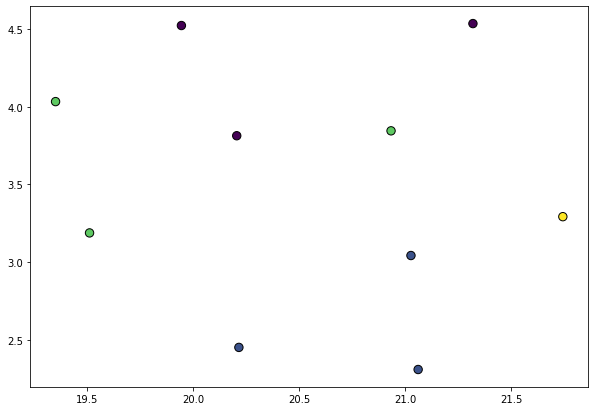

In [30]:
plt.figure(figsize=(10,7))
plt.scatter(embs[:, 0], embs[:, 1], c=birds['name_id'][:10], s=70, edgecolor="k")
plt.show()

In [31]:
# Неверное количество кластеров
y_pred = knn_clf.predict(birds['speechs'][:10].tolist())

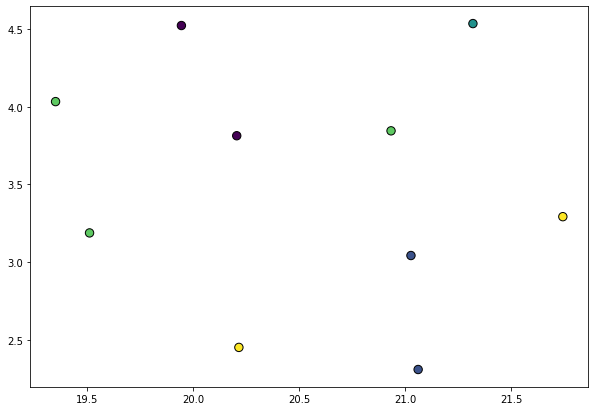

In [32]:
plt.figure(figsize=(10,7))
plt.scatter(embs[:, 0], embs[:, 1], c=y_pred, s=70, edgecolor="k")
plt.show()

In [33]:
from sklearn.cluster import KMeans

In [34]:
# Неверное количество кластеров
y_pred = KMeans(n_clusters=5, random_state=42).fit_predict(birds['speechs'].tolist())

In [35]:
embs = umap.UMAP().fit_transform(birds['speechs'].tolist())

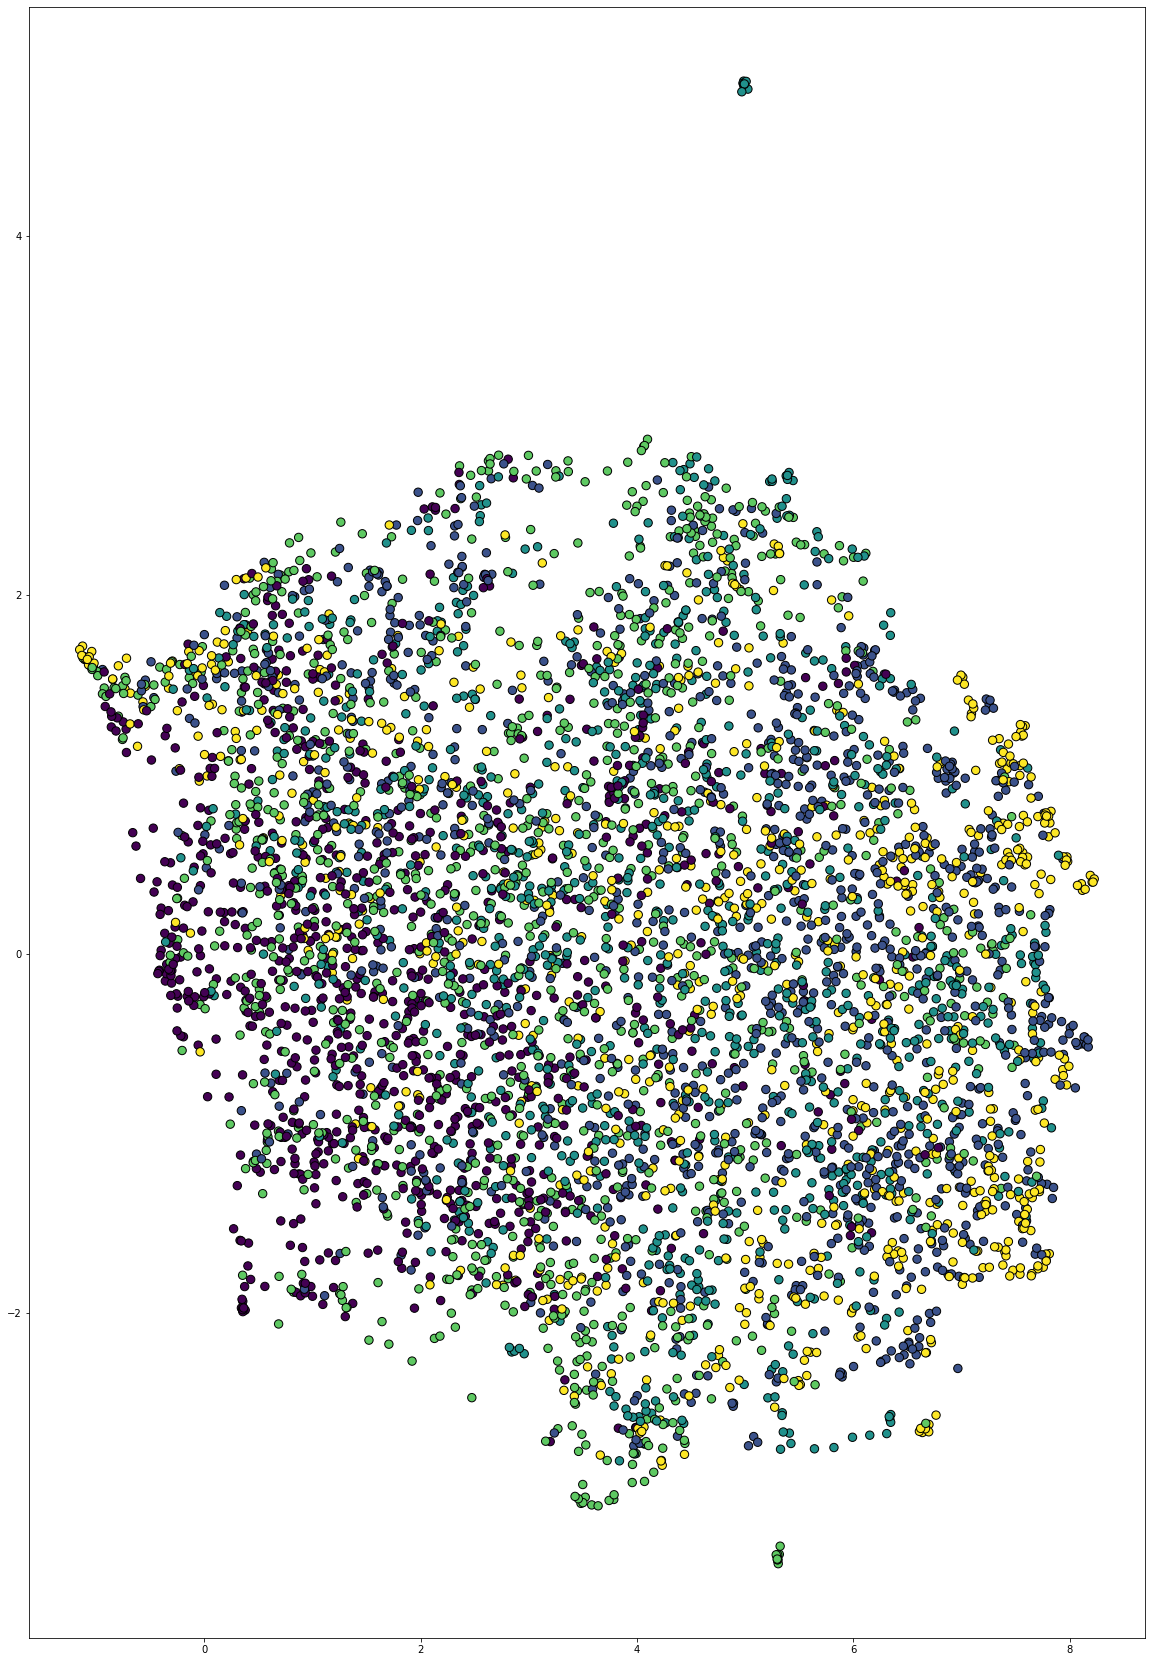

In [36]:
plt.figure(figsize=(20,30))
plt.scatter(embs[:, 0], embs[:, 1], c=birds['name_id'], s=70, edgecolor="k")
plt.show()

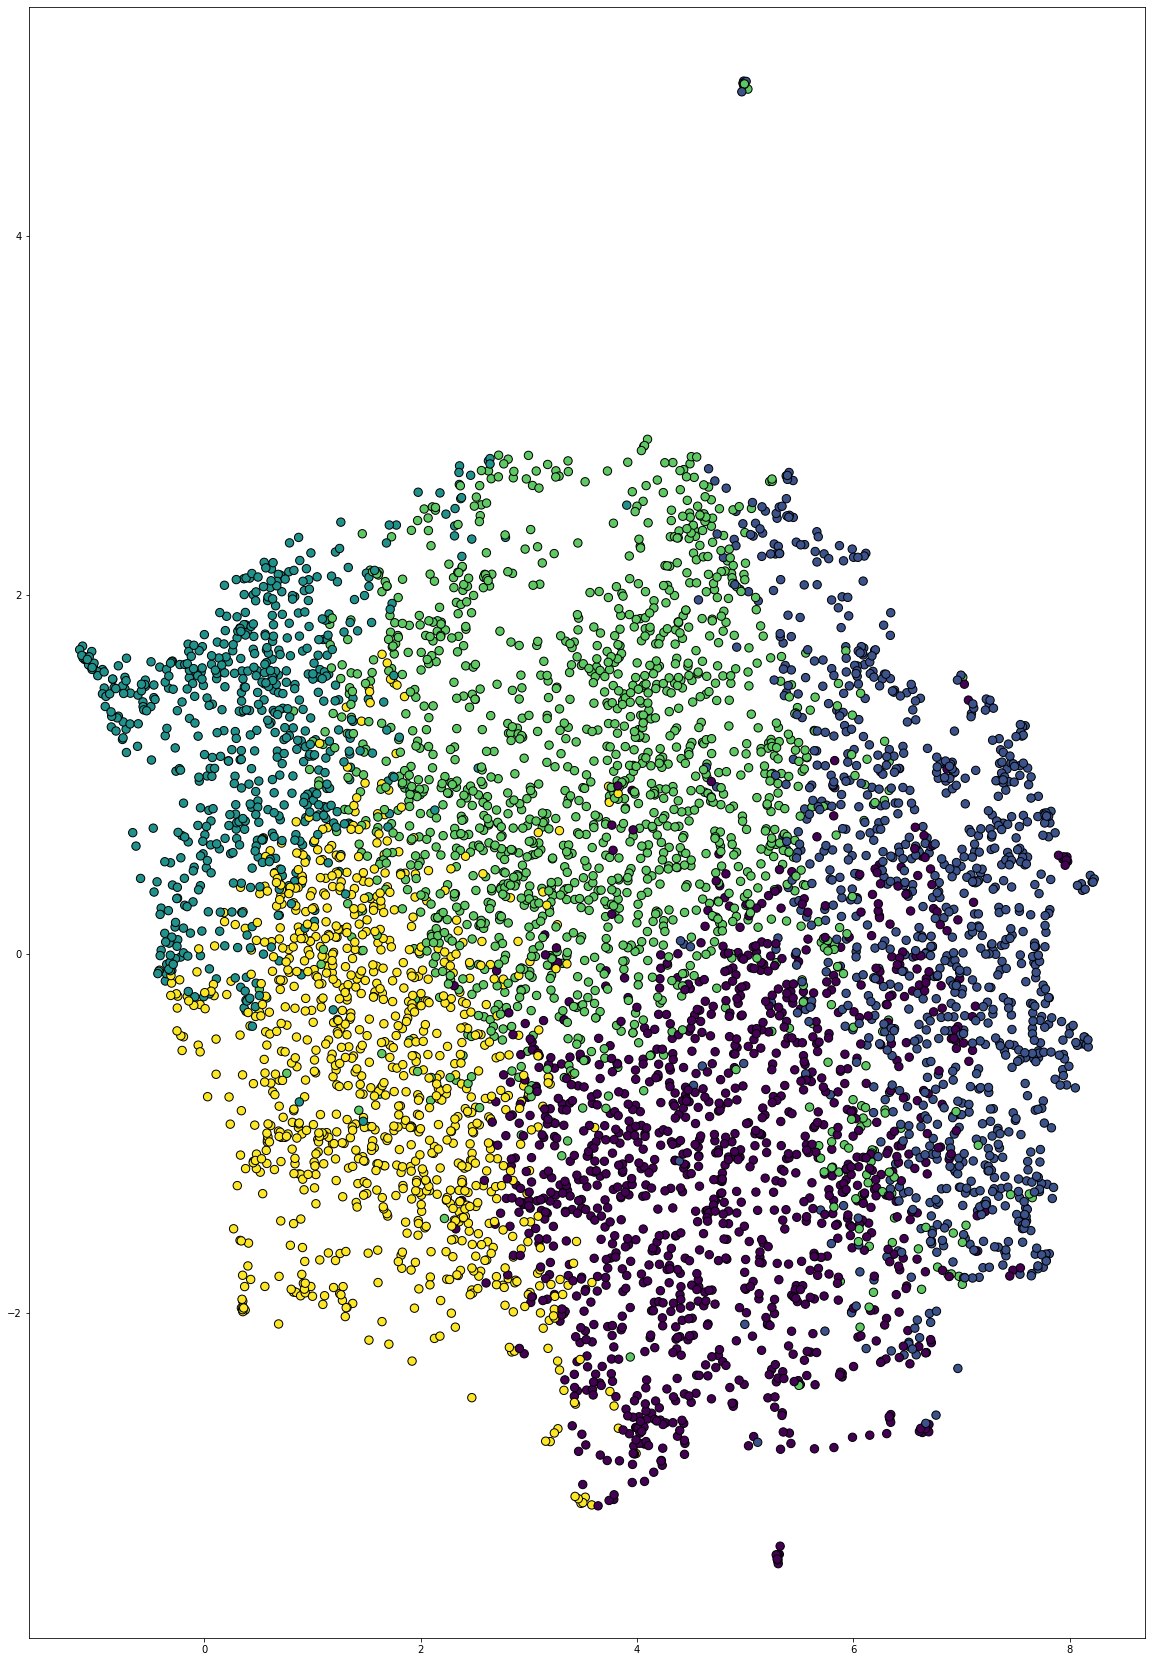

In [37]:
plt.figure(figsize=(20,30))
plt.scatter(embs[:, 0], embs[:, 1], c=y_pred, s=70, edgecolor="k")
plt.show()

In [38]:
from scipy.spatial.distance import cdist

In [39]:
query = birds.loc[10]

In [40]:
query

id                                                     557838
name                                            Bewick's Wren
filename                                        557838-17.wav
name_id                                                     4
speechs     [0.2305372661146904, 0.2305405653887818, 0.230...
len                                                      1560
Name: 10, dtype: object

In [41]:
import IPython

In [42]:
IPython.display.Audio(path / query['filename'])

In [43]:
birds

,id,name,filename,name_id,speechs,len
1679,232710,Northern Mockingbird,232710-2.wav,3,"[0.17581794154273706, 0.17686830205725082, 0.1...",1560
1172,423438,Northern Mockingbird,423438-2.wav,3,"[0.4457891552170575, 0.443988824198198, 0.4414...",1560
4319,62782,Song Sparrow,62782-8.wav,1,"[0.25536594764021714, 0.25557102058830744, 0.2...",1560
2500,367008,American Robin,367008-2.wav,0,"[0.2862367442972466, 0.28717065301848205, 0.28...",1560
992,541496,Northern Mockingbird,541496-7.wav,3,"[0.23611463672081048, 0.2353979020363294, 0.23...",1560
...,...,...,...,...,...,...
3114,561356,Song Sparrow,561356-7.wav,1,"[0.2873267470213144, 0.28233074230228217, 0.27...",1560
2618,322734,American Robin,322734-3.wav,0,"[0.24707659898274856, 0.24780745063348245, 0.2...",1560
2347,408817,American Robin,408817-1.wav,0,"[0.11744842641269883, 0.12064010807350971, 0.1...",1560
4554,466697,Northern Cardinal,466697-3.wav,2,"[0.3536433915794316, 0.3491053973326532, 0.344...",1560


In [44]:
birds.loc[0]

id                                                     557838
name                                            Bewick's Wren
filename                                         557838-0.wav
name_id                                                     4
speechs     [0.22453869088539227, 0.22494374087807, 0.2253...
len                                                      1560
Name: 0, dtype: object

In [45]:
#Вычисляем стреднеквадратичискую ошибку и записываем ее
import sklearn
def find_simmilar(query):
    birds['MSE'] = birds.apply(lambda bird: sklearn.metrics.mean_squared_error(bird['speechs'], query['speechs']), axis=1)

In [46]:
find_simmilar(query)

In [47]:
#Отсортируем по MSE
birds.sort_values(by=['MSE'], ascending=True, inplace=True)

In [48]:
birds.head(10)

,id,name,filename,name_id,speechs,len,MSE
10,557838,Bewick's Wren,557838-17.wav,4,"[0.2305372661146904, 0.2305405653887818, 0.230...",1560,0.000000
0,557838,Bewick's Wren,557838-0.wav,4,"[0.22453869088539227, 0.22494374087807, 0.2253...",1560,0.000487
1877,57040,Northern Mockingbird,57040-9.wav,3,"[0.22180635938210586, 0.22221486403411103, 0.2...",1560,0.008985
993,541496,Northern Mockingbird,541496-8.wav,3,"[0.35664154649481467, 0.3533071146470416, 0.34...",1560,0.010841
992,541496,Northern Mockingbird,541496-7.wav,3,"[0.23611463672081048, 0.2353979020363294, 0.23...",1560,0.010920
2295,464766,American Robin,464766-14.wav,0,"[0.22371946006729895, 0.22570466223091298, 0.2...",1560,0.011225
4,557838,Bewick's Wren,557838-6.wav,4,"[0.2318111682618879, 0.2319182008855577, 0.231...",1560,0.011500
1,557838,Bewick's Wren,557838-1.wav,4,"[0.07495413423220985, 0.08262761908604573, 0.0...",1560,0.011512
1991,18484,Northern Mockingbird,18484-1.wav,3,"[0.20433576210335896, 0.20195732093614296, 0.2...",1560,0.011680
1873,57040,Northern Mockingbird,57040-5.wav,3,"[0.17521770148471455, 0.1803890551865302, 0.18...",1560,0.011894


In [49]:
ans = birds.iloc[2]

In [50]:
ans

id                                                      57040
name                                     Northern Mockingbird
filename                                          57040-9.wav
name_id                                                     3
speechs     [0.22180635938210586, 0.22221486403411103, 0.2...
len                                                      1560
MSE                                                  0.008985
Name: 1877, dtype: object

In [51]:
IPython.display.Audio(path / ans['filename'])

In [52]:
ans = birds.iloc[3]
IPython.display.Audio(path / ans['filename'])

In [53]:
ans = birds.iloc[5]
IPython.display.Audio(path / ans['filename'])